# Preliminary EDA - Business Dataset

TO DO:
    
emma - filter by is open, is rest. (done -- use open_restaurants df, will work on the filtering for is_restaurant more though to make sure we aren't excluding any)<br> 
Julia - expand attributes &  categories, <br>
no hours,address, name for training -- more for final result

## Import Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# import the data (chunksize returns jsonReader for iteration)

# TODO: change the file/folder below for the json once in github !!
businesses = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
def basic_details(df):
    print('Row:{}, columns:{}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    #k['number of Unique value'] = df.nunique()
    k['Number of missing value'] = df.isnull().sum()
    k['Data type'] = df.dtypes
    return k

## Initial Perusal of Business Dataset

In [4]:
basic_details(businesses)

Row:150346, columns:14


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
postal_code,0,object
latitude,0,float64
longitude,0,float64
stars,0,float64
review_count,0,int64


In [5]:
businesses[['city','state']].value_counts()[:20]

city              state
Philadelphia      PA       14567
Tucson            AZ        9249
Tampa             FL        9048
Indianapolis      IN        7540
Nashville         TN        6968
New Orleans       LA        6208
Reno              NV        5932
Edmonton          AB        5054
Saint Louis       MO        4827
Santa Barbara     CA        3829
Boise             ID        2937
Clearwater        FL        2221
Saint Petersburg  FL        1663
Metairie          LA        1643
Sparks            NV        1623
Wilmington        DE        1445
Franklin          TN        1410
St. Louis         MO        1254
St. Petersburg    FL        1185
Meridian          ID        1042
dtype: int64

<AxesSubplot:xlabel='name'>

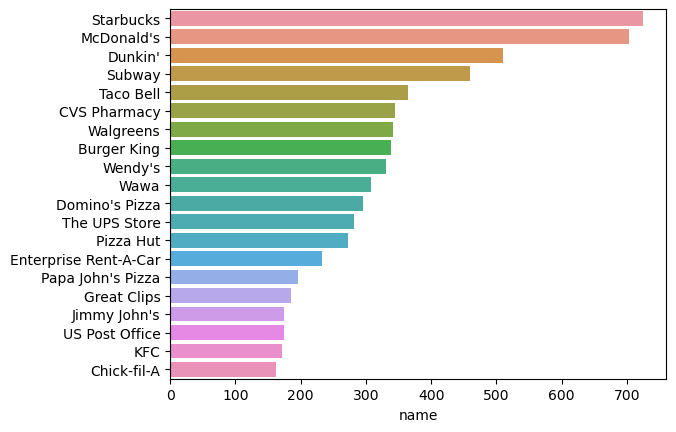

In [6]:
# top 20 common restaurants:
cnt = businesses['name'].value_counts()[:20].to_frame()
sns.barplot(x = cnt['name'], y = cnt.index)

<AxesSubplot:xlabel='categories'>

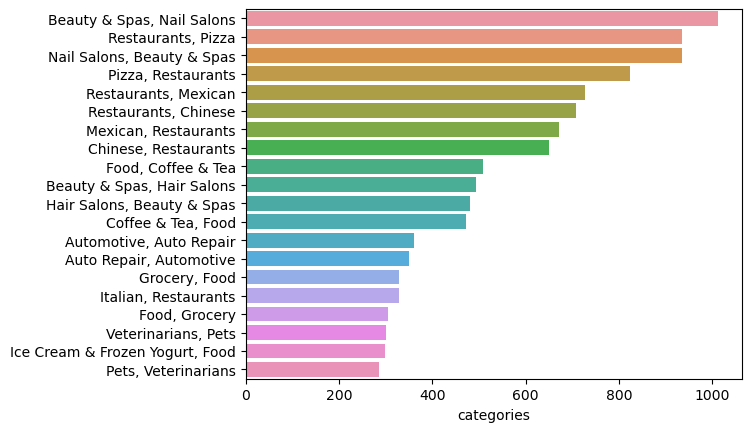

In [7]:
#top 20 common categories
cnt = businesses['categories'].value_counts()[:20].to_frame()
sns.barplot(x = cnt['categories'], y = cnt.index)

In [8]:
#find only restaurant categories -- may need to check if other keywords besides 'Restaurants'
def restaurant(row):
    if row['categories']:
        if 'Restaurants' in row['categories']:
            return 1
        else:
            return 0
    return 0

businesses['is_restaurant'] = businesses.apply(restaurant, axis = 1)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",0


In [9]:
open_restaurants = businesses[(businesses['is_restaurant'] == 1) & (businesses['is_open'] == 1)]

In [10]:
basic_details(open_restaurants)

Row:34987, columns:15


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
postal_code,0,object
latitude,0,float64
longitude,0,float64
stars,0,float64
review_count,0,int64


In [11]:
open_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1


In [12]:
open_restaurants['attributes']

3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
5         {'BusinessParking': 'None', 'BusinessAcceptsCr...
9         {'RestaurantsAttire': ''casual'', 'Restaurants...
11        {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
12        {'RestaurantsReservations': 'False', 'Restaura...
                                ...                        
150323    {'BikeParking': 'True', 'Alcohol': 'u'full_bar...
150325    {'BikeParking': 'True', 'BusinessAcceptsCredit...
150327    {'WiFi': ''free'', 'RestaurantsGoodForGroups':...
150336    {'WheelchairAccessible': 'False', 'Restaurants...
150339    {'RestaurantsDelivery': 'False', 'BusinessAcce...
Name: attributes, Length: 34987, dtype: object

<AxesSubplot:xlabel='categories'>

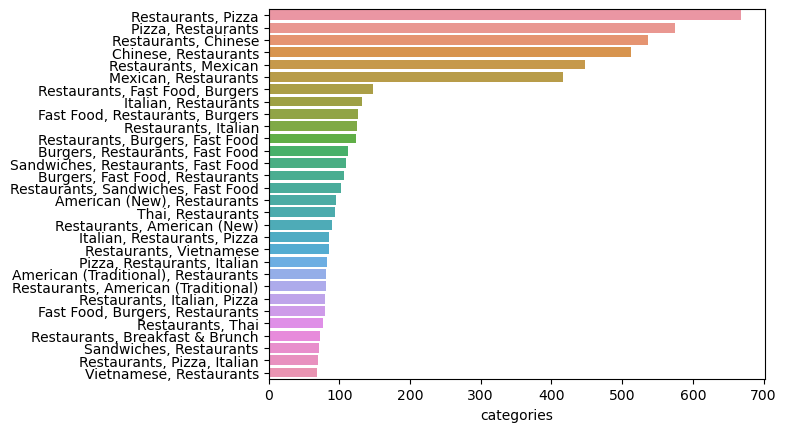

In [13]:
#top 20 common categories
cnt = open_restaurants['categories'].value_counts()[:30].to_frame()
sns.barplot(x = cnt['categories'], y = cnt.index)

In [14]:
unique_set = set([word.strip() for word in ','.join(open_restaurants['categories'].to_list()).split(',')])
unique_cats = list(unique_set)

In [15]:
###### valid_cats = []

In [16]:
# start = 'Sports Clubs'\
start = unique_cats[0]
for cat in unique_cats[unique_cats.index(start):]: 
    valid = input(cat+ " is rest cat: ")
    if valid in ["y", "yes", "Y", "Yes", "t" ,"true", 'T', 'True']:
        valid_cats.append(cat)
    elif valid == "STOP": 
        print("\nSTOPPED at: "+ cat)
        break

KeyboardInterrupt: Interrupted by user

In [ ]:
valid_set = set(valid_cats)
invalid_set = unique_set.difference(valid_set)

In [ ]:
for item in sorted(valid_cats):
    print(item)

In [ ]:
for item in sorted(invalid_set):
    print(item)

## RUN THESE IF YOU HAVEN'T RUN THE INITIAL PERUSAL CELLS

In [17]:
def restaurant(row):
    if row['categories']:
        if 'Restaurants' in row['categories']:
            return 1
    return 0

businesses['is_restaurant'] = businesses.apply(restaurant, axis = 1)
open_restaurants = businesses[(businesses['is_restaurant'] == 1) & (businesses['is_open'] == 1)]

In [18]:
with open("valid_cats.txt", "r") as f:
    valid_cats = f.read()
    valid_cats = valid_cats.split("\n")

## Explode Categories

In [19]:
new_cols = [open_restaurants]
for cat in valid_cats:
    new_cols.append((1*open_restaurants['categories'].str.contains(cat, regex = False)).rename(cat))
open_restaurants_exploded = pd.concat(new_cols, axis = 1)
#open_restaurants_exploded.drop(['categories'], axis = 1, inplace = True)

# Remove rows that dont have any of the valid tags? 
print(f"Num rows before: {open_restaurants_exploded.shape[0]}")
open_restaurants_clean = open_restaurants_exploded[open_restaurants_exploded[valid_cats].sum(axis=1) != 0]
print(f"Num rows cleaned: {open_restaurants_clean.shape[0]}")

Num rows before: 34987
Num rows cleaned: 34987


## Look at exploded data

In [20]:
basic_details(open_restaurants_clean)

Row:34987, columns:293


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
...,...,...
Wine Tasting Room,0,int64
Wine Tours,0,int64
Wineries,0,int64
Wraps,0,int64


<AxesSubplot:>

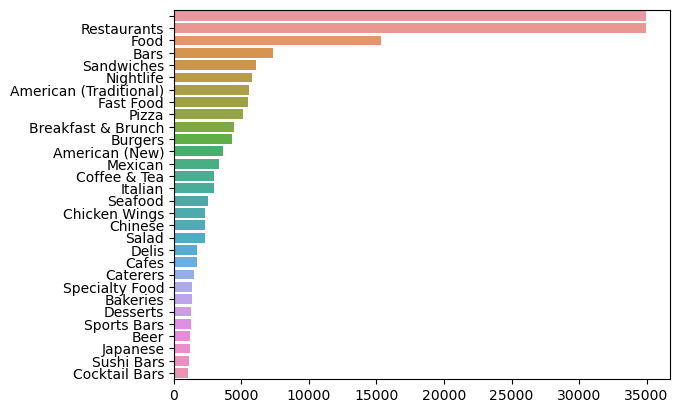

In [21]:
cnt = open_restaurants_clean[valid_cats].sum(numeric_only=None).sort_values(ascending = False)[:30]
sns.barplot(x = cnt.values, y = cnt.index)

## Condense our categories

In [22]:
# Remove rows that dont have any of the valid categories and only keep top 30 categories
print(f"Shape  before: {open_restaurants_clean.shape}")
cnt = open_restaurants_clean[valid_cats].sum(numeric_only=None).sort_values(ascending = False)[:30]
drop_cats = set(valid_cats).difference(cnt.index)
open_restaurants_condensed = open_restaurants_clean[open_restaurants_clean[cnt.index].sum(axis=1) != 0].drop(drop_cats, axis = 1)
print(f"Shape condensed: {open_restaurants_condensed.shape}")

Shape  before: (34987, 293)
Shape condensed: (34987, 45)


## look at condensed

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(basic_details(open_restaurants_condensed))

Row:34987, columns:45
                        Number of missing value Data type
business_id                                   0    object
name                                          0    object
address                                       0    object
city                                          0    object
state                                         0    object
postal_code                                   0    object
latitude                                      0   float64
longitude                                     0   float64
stars                                         0   float64
review_count                                  0     int64
is_open                                       0     int64
attributes                                  440    object
categories                                    0    object
hours                                      3370    object
is_restaurant                                 0     int64
American (New)                                0   

## Explode Attributes

In [24]:
open_restaurants_condensed = open_restaurants_condensed.join(pd.json_normalize(open_restaurants_condensed['attributes']))
open_restaurants_condensed.drop(['DietaryRestrictions','HairSpecializesIn'], inplace = True, axis = 1)

In [25]:
for col in ['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsTakeOut', 'ByAppointmentOnly',
            'Caters', 'RestaurantsReservations','GoodForKids' ,'CoatCheck', 'DogsAllowed','RestaurantsTableService','RestaurantsGoodForGroups',
            'WheelchairAccessible','HasTV','HappyHour','DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing', 'BYOB','Corkage',
            'RestaurantsCounterService','Open24Hours','AcceptsInsurance']:
    open_restaurants_condensed[col].replace({'True': 1, 'False': -1, 'None' : 0, np.nan:0}, inplace = True)

In [26]:
## ASSUMPTIONS MADE HERE... sometimes none/nan should not be interpreted as 0, but here we assume so... 

attribute_conversions = {
    'RestaurantsPriceRange2': {'2':2, '1':1, '3':3, '4':4, 'None':np.nan},
    'WiFi': {np.nan:0, "'free'":1, "u'free'":1, "u'no'":0, "u'paid'":-1, "'no'":0, "'paid'":-1, 'None':0},
    'Alcohol': {"'none'":0, "'full_bar'":2, np.nan:0, "u'full_bar'":2, "u'none'":0, "'beer_and_wine'":1, "u'beer_and_wine'":1, 'None':0},
    'RestaurantsAttire': {np.nan:0, "'casual'":1, "u'casual'":1, "u'dressy'":2, "'dressy'":2, "u'formal'":3, 'None':0, "'formal'":3},
    'NoiseLevel': {np.nan:0, "u'average'":0, "u'quiet'":-1, "u'very_loud'":2, "'average'":0, "u'loud'":1, "'quiet'":-1, "'loud'":1, 'None':0, "'very_loud'":2,},
    'Smoking': {np.nan:0, "u'outdoor'":1, "u'no'":2, "u'yes'":-1, "'no'":2},
    'BYOBCorkage':{np.nan:0, "'no'":-1, "'yes_free'":2, 'None':0, "'yes_corkage'":1, "u'no'":-1, "u'yes_free'":2, "u'yes_corkage'":1},
    'AgesAllowed':{np.nan:0, "u'allages'":1, "u'21plus'":2}
}

for col, mapping in attribute_conversions.items():
    open_restaurants_condensed[col].replace(mapping, inplace = True)

In [27]:
for col in ['BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights']:
    open_restaurants_condensed[col] = open_restaurants_condensed[col].apply(lambda x: eval(x) if isinstance(x, str) else x)
    df = pd.json_normalize(open_restaurants_condensed[col])
    df.columns = [col+'.'+column for column in df.columns]
    open_restaurants_condensed.drop(col, inplace = True, axis = 1)
    open_restaurants_condensed = open_restaurants_condensed.join(df)
    

## Look at exploded attributes

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(basic_details(open_restaurants_condensed))

Row:34987, columns:111
                            Number of missing value Data type
business_id                                       0    object
name                                              0    object
address                                           0    object
city                                              0    object
state                                             0    object
postal_code                                       0    object
latitude                                          0   float64
longitude                                         0   float64
stars                                             0   float64
review_count                                      0     int64
is_open                                           0     int64
attributes                                      440    object
categories                                        0    object
hours                                          3370    object
is_restaurant                                  

## Save the ds

In [29]:
open_restaurants_condensed.to_csv('business_data.csv',index=False)

## OPEN QUESTIONS

In [30]:
### Questions about data 
## Remove restaurants with less reviews? or just remove review_coubnt as column??
## Remove sparse attributes?
## Sparse categories were removed, but should we find another way to consolidate?
## data is fairly high dimensional...

In [31]:
sum(open_restaurants_condensed['review_count'] > 100)

9333

In [ ]:
open_restaurants_condensed.groupby('city').sum().sort_values('review_count',ascending = False)[0:30][['review_count']]

In [ ]:
open_restaurants_condensed.columns[0:30]

## Group categories:

In [47]:
def group(row,cat_type):
    if cat_type == 'American':
        possible = ['American (New)', 'American (Traditional)']
    if cat_type == 'Dessert':
        possible = ['Bakeries','Chocolatiers & Shops','Creperies','Cupcakes','Custom Cakes','Desserts','Donuts','Fondue','Gelato','Ice Cream & Frozen Yogurt'
                    ,'Patisserie/Cake Shop','Shaved Ice','Shaved Snow','Waffles','Macarons']
    if cat_type == 'Bar':
        possible = [ 'Bar Crawl','Bars','Bartenders','Brewpubs','Champagne Bars','Cideries','Cocktail Bars','Dive Bars'
                    ,'Drive-Thru Bars','Gay Bars','Hookah Bars','Nightlife','Pubs','Social Clubs','Sports Bars'
                        ,'Sports Clubs','Tapas Bars','Tiki Bars','Whiskey Bars','Speakeasies','Jazz & Blues','Karaoke','Gastropubs','Irish Pub']
    if cat_type == 'Beer,Wine,Spirits':
        possible = ['Beer','Beer Bar','Beer Gardens','Breweries','Wine & Spirits','Wine Bars','Wine Tasting Classes','Wine Tasting Room','Wine Tours','Wineries','Distilleries','Paint & Sip','Beverage Store']
    if cat_type == 'Breakfast':
        possible = ['Bed & Breakfast','Breakfast & Brunch','Bagels','Diners']
    if cat_type == 'Coffee & Tea':
        possible = ['Cafes','Coffee & Tea','Coffee & Tea Supplies','Coffee Roasteries','Coffeeshops','Bubble Tea','Tea Rooms','Themed Cafes']
    if cat_type == 'Asian':
        possible = ['Tonkatsu','Teppanyaki','Sushi Bars','Ramen','Izakaya','Japanese','Japanese Curry','Donburi','Conveyor Belt Sushi','Cantonese','Chinese'
                    ,'Dim Sum','Fuzhou','Hainan','Hakka','Hong Kong Style Cafe','Shanghainese','Szechuan','Taiwanese','Asian Fusion','Dumplings','Filipino','Indonesian','Korean','Noodles','Pan Asian','Singaporean','Thai','Vietnamese','Hot Pot','Poke']
    if cat_type == 'Italian':
        possible = ['Italian','Cucina campana','Pasta Shops','Pizza','Sicilian']
    if cat_type == 'Healthy,Specialty Food':
        possible = ['Acai Bowls','Fruits & Veggies','Gluten-Free','Health Markets','Juice Bars & Smoothies','Kombucha'
                        ,'Kosher','Organic Stores','Salad','Specialty Food','Vegan','Vegetarian','Wraps']
    if cat_type == 'Mexican,Spanish':
        possible = ['Argentine','Colombian','Cuban','Dominican','Empanadas','Latin American','Mexican','New Mexican Cuisine','Puerto Rican','Spanish','Tacos','Tapas/Small Plates','Tex-Mex','Venezuelan']
    if cat_type == 'Mediterranean':
        possible = ['Egyptian','Falafel','Greek','Halal','Kebab','Lebanese','Mediterranean','Moroccan','Pita','Portuguese','Turkish','Syrian','Middle Eastern','Israeli']

    
    for thing in possible:
        if thing in row['categories']:
            return 1
    return 0

    
groups = ['American', 'Dessert', 'Bar', 'Beer,Wine,Spirits','Breakfast' ,'Coffee & Tea','Asian','Italian', 'Healthy,Specialty Food', 'Mexican,Spanish', 'Mediterranean'] #, 'Asian', 'Italian', 'Healthy,Specialty Food']
for cat in groups:
    print(cat)
    open_restaurants_condensed['is_' + cat] = open_restaurants_condensed.apply(group, cat_type =cat,axis=1)
    

American
Dessert
Bar
Beer,Wine,Spirits
Breakfast
Coffee & Tea
Asian
Italian
Healthy,Specialty Food
Mexican,Spanish
Mediterranean


In [48]:
open_restaurants_condensed.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count',
       ...
       'is_Dessert', 'is_Bar', 'is_Beer,Wine,Spirits', 'is_Breakfast',
       'is_Coffee & Tea', 'is_Asian', 'is_Italian',
       'is_Healthy,Specialty Food', 'is_Mexican,Spanish', 'is_Mediterranean'],
      dtype='object', length=122)

# Clustering by business

### using only some attributes

In [158]:
X = open_restaurants_condensed[['stars','American (New)',
       'American (Traditional)', 'Bakeries', 'Bars', 'Beer',
       'Breakfast & Brunch', 'Burgers', 'Cafes', 'Caterers', 'Chicken Wings',
       'Chinese', 'Cocktail Bars', 'Coffee & Tea', 'Delis', 'Desserts',
       'Fast Food', 'Food', 'Italian', 'Japanese', 'Mexican', 'Nightlife', 'Pizza',
       'Restaurants', 'Salad', 'Sandwiches', 'Seafood', 'Specialty Food',
       'Sports Bars', 'Sushi Bars','is_American', 'is_Dessert', 'is_Bar',
       'is_Beer,Wine,Spirits', 'is_Breakfast', 'is_Coffee & Tea', 'is_Italian',
       'is_Healthy,Specialty Food', 'is_Asian','is_Mexican,Spanish', 'is_Mediterranean']] #

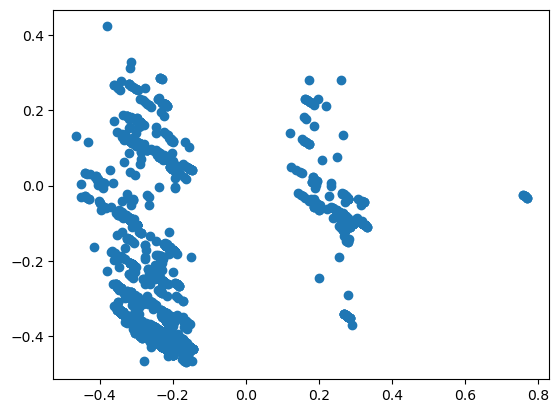

In [159]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

from sklearn.preprocessing import MinMaxScaler

#Scale the data to the range between 0 and 1 before using PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

#Load Data
pca = PCA(n_components = 0.95) # menans the explained variance is 95%; usually want between .95-.99

#Transform the data
df = pca.fit_transform(data_rescaled)

df.shape

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
label = kmeans.fit_predict(df)
#filter rows of original data
import matplotlib.pyplot as plt
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()


#optics 

In [160]:
label

array([1, 7, 7, ..., 1, 9, 2], dtype=int32)

In [82]:
X.sample(10)

,stars,American (New),American (Traditional),Bakeries,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,is_Dessert,is_Bar,"is_Beer,Wine,Spirits",is_Breakfast,is_Coffee & Tea,is_Italian,"is_Healthy,Specialty Food",is_Asian,"is_Mexican,Spanish",is_Mediterranean
81501,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35364,3.5,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
52155,4.0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
134694,3.5,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
122914,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99284,2.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94512,4.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34489,2.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32124,4.0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
142326,4.0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [156]:
#top_rest = open_restaurants_condensed.sample(10)
#top_rest_id = list(top_rest['business_id'])
#print(top_rest)

In [161]:
### attempt at a recommendation: 

all_rest = X
all_rest['label'] = label
all_rest['name'] = open_restaurants_condensed['name']
all_rest['city'] = open_restaurants_condensed['city']
philly = all_rest[all_rest['city'] == 'Philadelphia']
philly['bus_id'] =  pd.Series(open_restaurants_condensed['business_id'])

top_rest = philly.sample(10)
top_rest_id = list(top_rest['bus_id'])

def recommend(top_rest, all_rest):
    #top_rest = list of top rated restaurants business_id
    #all_rest = df of restaurants with the clustering labels
    #returns 3 recommended restaurants 
    
    
    
    #get highest occuring cluster
    topCluster = all_rest[all_rest['bus_id'].isin(top_rest)]['label'].value_counts().reset_index().iloc[0][0]
    print(all_rest[all_rest['bus_id'].isin(top_rest)]['label'].value_counts())
    #get all rest in that cluster label
    cluster = all_rest[all_rest['label'] == topCluster]
    
    #better way to do this, but choose 3 randomly?
    
    random_three = cluster.sample(5)
    
    return random_three
    
    

/var/folders/08/_8h0msbx2d53rl64ky84n21w0000gn/T/ipykernel_49247/2847513631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rest['label'] = label
/var/folders/08/_8h0msbx2d53rl64ky84n21w0000gn/T/ipykernel_49247/2847513631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rest['name'] = open_restaurants_condensed['name']
/var/folders/08/_8h0msbx2d53rl64ky84n21w0000gn/T/ipykernel_49247/2847513631.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [162]:
recommend(top_rest_id, philly)

5    3
0    1
6    1
2    1
1    1
3    1
8    1
4    1
Name: label, dtype: int64


,stars,American (New),American (Traditional),Bakeries,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,is_Coffee & Tea,is_Italian,"is_Healthy,Specialty Food",is_Asian,"is_Mexican,Spanish",is_Mediterranean,label,name,city,bus_id
53458,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,Super House,Philadelphia,PmWjC2tCN0uhUYzUnKyPqw
85416,1.5,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5,Fresh Garden,Philadelphia,pZGUnFYoXr2ccOxWr-F9Cw
112914,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,Bao Nine,Philadelphia,uf4gH2bLBox8bCHw30kJxQ
112764,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,Panda Garden,Philadelphia,fGeaHPDRkZj6ZUF37fe-XQ
15885,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,Daleng Restaurant,Philadelphia,v6tFMx_fKBcfiBagKb_EIg


In [163]:
top_rest

,stars,American (New),American (Traditional),Bakeries,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,is_Coffee & Tea,is_Italian,"is_Healthy,Specialty Food",is_Asian,"is_Mexican,Spanish",is_Mediterranean,label,name,city,bus_id
144679,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,China Garden,Philadelphia,jh-Sg2S4wlelkifvhjwSlg
130333,4.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5,Terryin,Philadelphia,GKohndn_sMk2nWCh1jkAfg
118303,5.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,Caffe Ida,Philadelphia,t5n5IBvXYG55xXrq6hga3Q
20523,4.0,1,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,6,Sabrina's Café,Philadelphia,iUZEGx29miZObLd6_lt7Vg
137821,2.5,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,8,Tiffany Diner,Philadelphia,yYwZWTgSoweD0YNh2p9QRw
138487,3.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,You Ring We Bring,Philadelphia,uNh3Eeucqrd07qJ8hG11dQ
14829,3.5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Green Eggs Cafe,Philadelphia,s3Q1J4XEVOBiZy9dYUpqpg
59388,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,Dim Sum & Noodle,Philadelphia,UPD4qX0t1lm7G86mrj889w
122932,3.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,3,Brexel Cafe,Philadelphia,Ipx423BSHRNBXuMwUHBxqw
115381,4.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,Long Shot BBQ,Philadelphia,iRp8WsHdN1Acmp-P5Tx-mg


## Other testing

### just generic groups

not enough features

In [60]:
generic =  open_restaurants_condensed[['stars','is_American', 'is_Dessert', 'is_Bar',
       'is_Beer,Wine,Spirits', 'is_Breakfast', 'is_Coffee & Tea', 'is_Italian',
       'is_Healthy,Specialty Food', 'is_Asian','is_Mexican,Spanish', 'is_Mediterranean']] #

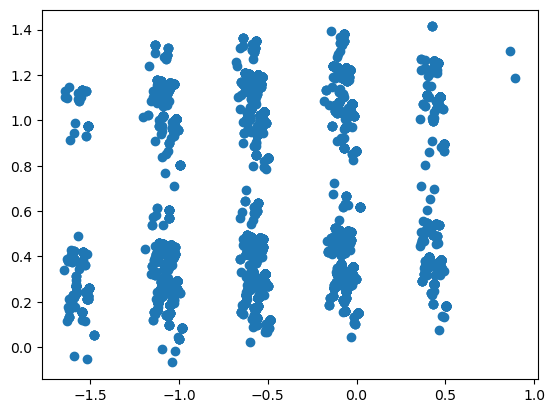

In [65]:
pca = PCA(n_components = 0.95)

#Transform the data
df = pca.fit_transform(generic)

df.shape

kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(df)
#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

### using most populated columns (top30)

In [ ]:
top30 = list(basic_details(open_restaurants_condensed.replace({0:np.nan})).sort_values('Number of missing value', ascending =True)[17:48].reset_index()['index'])

top30df = open_restaurants_condensed[top30]

print(top30)


In [ ]:
pca = PCA(2)

#Transform the data
df = pca.fit_transform(top30df.dropna())

df.shape

kmeans = KMeans(n_clusters = 10)
label = kmeans.fit_predict(df)
#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

## random stuff 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Load Data
#print(open_restaurants_condensed.columns[30:50])
big = open_restaurants_condensed.select_dtypes(include=np.number).dropna()

pca = PCA(2)

#Transform the data
df = pca.fit_transform(big)

df.shape

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(df)

#filter rows of original data
import matplotlib.pyplot as plt
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()